In [169]:
import numpy as npy
import pandas as pds

import seaborn as sea
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import confusion_matrix, roc_curve, r2_score
from sklearn.datasets import load_iris, load_wine, load_diabetes

In [170]:
models = [
    LinearRegression (),
    LogisticRegression (max_iter=1000),
    DecisionTreeClassifier (max_depth=3),
    DecisionTreeRegressor (max_depth=3),
    RandomForestRegressor (),
    RandomForestClassifier (),
    KMeans (n_clusters=3, n_init=10),
    KNeighborsRegressor (n_neighbors=5, p=2),
    KNeighborsClassifier (n_neighbors=5, p=2),
    SVC (kernel='rbf'),
    SVR (kernel='rbf'),
    GaussianNB (), 
    MultinomialNB (),
    BernoulliNB ()
]

In [171]:
dataset = load_iris ()
dfr = pds.DataFrame (data=dataset['data'], columns=dataset['feature_names'])
dfr['target'] = dataset['target']
dfr

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
145       2  
146       2  
147       2  
148       2  
149       2  

[150 rows x 5 columns]

In [172]:
X = dfr.iloc[:, :-1]
yhat = dfr['target']

In [173]:
X_train, X_test, y_train, y_test = train_test_split (X, yhat, test_size=0.2)

In [174]:
# x_tmp, y_tmp = X, y
# xx, yy = npy.meshgrid (npy.arange (start=x_tmp[:, 0].min () - 1, stop=x_tmp[:, 0].max () + 1, step=0.01), npy.arange (start=x_tmp[:, 1].min () - 1, stop=x_tmp[:, 1].max () + 1, step=0.01))
# plt.contourf (xx, yy, model.predict (npy.array ([xx.ravel (), yy.ravel ()]).T).reshape (xx.shape))
# plt.scatter (*X.T, s=50)

In [175]:
def pipeliner (models):
    model_pipelines = list ()

    for model in models:
        model.fit (X_train, y_train)

        print (model.__class__.__name__)
        if hasattr (model, 'predict_proba'):
            print (f"Accuracy :{cross_val_score (model, X_train, y_train, scoring='accuracy').mean ()}")
            print (f"F1 Score :{cross_val_score (model, X_train, y_train, scoring='f1_macro').mean ()}")
            print (f"Recall :{cross_val_score (model, X_train, y_train, scoring='recall_macro').mean ()}")
        else:
            print (f"Negative mean squared error: {cross_val_score (model, X_train, y_train, scoring='neg_mean_squared_error').mean ()}")
        print ()
        
pipeliner (models)

LinearRegression
Negative mean squared error: -0.05057028569353228

LogisticRegression
Accuracy :0.975
F1 Score :0.9741798941798943
Recall :0.975

DecisionTreeClassifier
Accuracy :0.9833333333333334
F1 Score :0.9749019607843138
Recall :0.975

DecisionTreeRegressor
Negative mean squared error: -0.028530092592592593

RandomForestRegressor
Negative mean squared error: -0.03190083333333334

RandomForestClassifier
Accuracy :0.95
F1 Score :0.949281045751634
Recall :0.951851851851852

KMeans
Negative mean squared error: -0.7416666666666667

KNeighborsRegressor
Negative mean squared error: -0.03666666666666667

KNeighborsClassifier
Accuracy :0.9666666666666668
F1 Score :0.9655429171218646
Recall :0.9654761904761905

SVC
Negative mean squared error: -0.025

SVR
Negative mean squared error: -0.04243487118280388

GaussianNB
Accuracy :0.95
F1 Score :0.949075441242624
Recall :0.9506613756613757

MultinomialNB
Accuracy :0.7083333333333334
F1 Score :0.5868212560386473
Recall :0.6761904761904761

Bern

In [176]:
dataset = load_wine ()
dataset

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [177]:
dfr = pds.DataFrame (data=dataset['data'], columns=dataset['feature_names'])
dfr['class'] = dataset['target']
dfr

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  class  
0                            3.92   1065.0      0  
1                            3.40   1050.0      0  
2                            3.17   1185.0      0  
3                            3.45   1480.0      0  
4                            2.93    735.0      0  
..                            ...      ...    ...  
173                          1.74    740.0      2  
174                          1.56    750.0      2  
175                          1.56    835.0      2  
176                          1.62    840.0      2  
177                          1.60    560.0      2  

[178 rows x 14 columns]

In [178]:
features = dfr.corr ()['class'].sort_values (ascending=False)[1:]
features = features[abs (features) > 0.5]
required_features = features.index.to_list ()
required_features

['alcalinity_of_ash',
 'hue',
 'proline',
 'total_phenols',
 'od280/od315_of_diluted_wines',
 'flavanoids']

In [179]:
dfr = dfr[required_features]
dfr

alcalinity_of_ash   hue  proline  total_phenols  \
0                 15.6  1.04   1065.0           2.80   
1                 11.2  1.05   1050.0           2.65   
2                 18.6  1.03   1185.0           2.80   
3                 16.8  0.86   1480.0           3.85   
4                 21.0  1.04    735.0           2.80   
..                 ...   ...      ...            ...   
173               20.5  0.64    740.0           1.68   
174               23.0  0.70    750.0           1.80   
175               20.0  0.59    835.0           1.59   
176               20.0  0.60    840.0           1.65   
177               24.5  0.61    560.0           2.05   

     od280/od315_of_diluted_wines  flavanoids  
0                            3.92        3.06  
1                            3.40        2.76  
2                            3.17        3.24  
3                            3.45        3.49  
4                            2.93        2.69  
..                            ...         ...  
173                          1.74        0.61  
174                          1.56        0.75  
175                          1.56        0.69  
176                          1.62        0.68  
177                          1.60        0.76  

[178 rows x 6 columns]

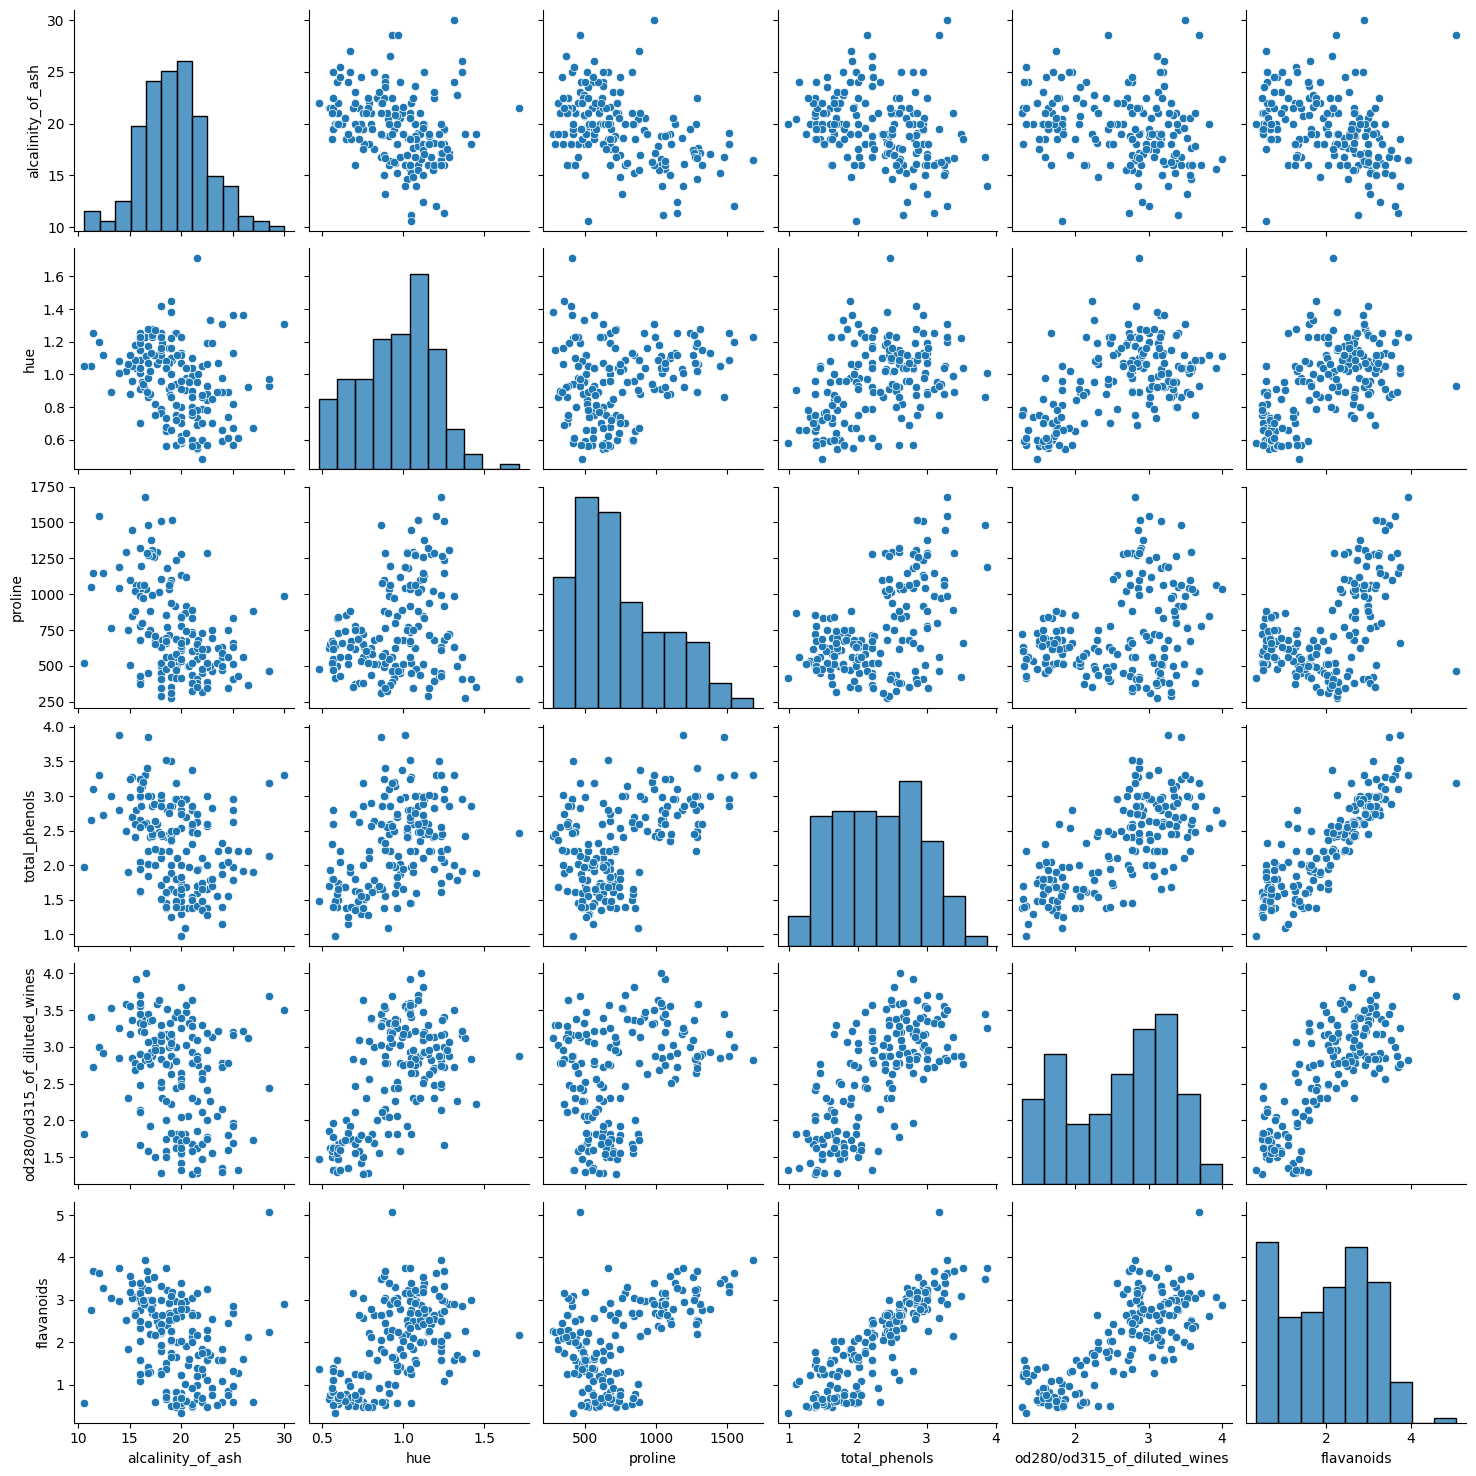

In [180]:
sea.pairplot (dfr)

<Axes: xlabel='total_phenols'>

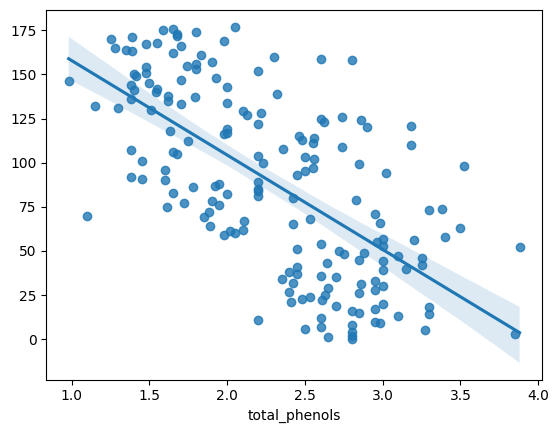

In [181]:
sea.regplot (x=dfr['total_phenols'], y=npy.arange (dfr['total_phenols'].size))

In [182]:
model = KMeans (n_clusters=3)

In [183]:
X_train, X_test, y_train, y_test = train_test_split (dfr, dataset['target'], test_size=0.2)
model.fit (X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [184]:
model.predict ([[15.6, 1.04, 1065.0, 2.80, 3.92, 3.06]])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

<Axes: >

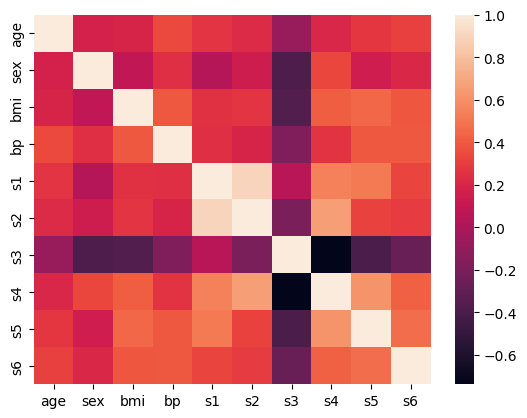

In [185]:
data = load_diabetes ()
dfr = pds.DataFrame (data=data['data'], columns=data['feature_names'])
sea.heatmap (dfr.corr ())
# X_train, X_test, y_train, y_test = train_test_split (data['data'], data['target'], test_size=0.2)
# model = GaussianNB ()

In [186]:
model.fit (X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

<Axes: >

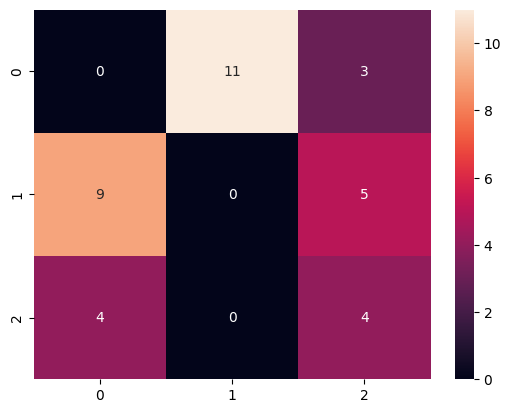

In [187]:
y_pred = model.predict (X_test)
sea.heatmap (confusion_matrix (y_test, y_pred), annot=True)

In [188]:
cross_val_score (model, X_train, y_train, scoring='accuracy').mean ()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

0.25935960591133

<Axes: xlabel='age'>

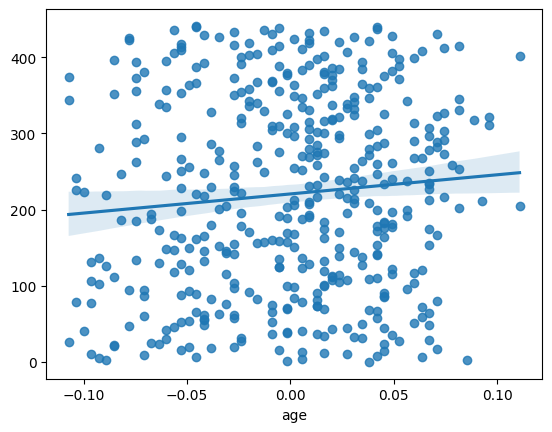

In [189]:
sea.regplot (x=dfr['age'], y=npy.arange (len (dfr['age'])))

In [190]:
from scipy.stats import boxcox


In [191]:
from scipy.stats import normaltest
normaltest (X['sepal width (cm)'])

NormaltestResult(statistic=3.1238322481520377, pvalue=0.2097338099298262)

/var/folders/8f/9lp__8v92vsfg8szvm_cz1tc0000gn/T/ipykernel_13757/3039863057.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sea.distplot ([10, 15, 18, 25, 30,


<Axes: ylabel='Density'>

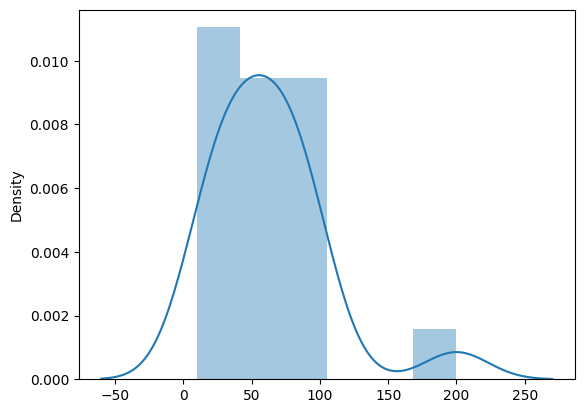

In [192]:
sea.distplot ([10, 15, 18, 25, 30,
    35, 40, 45, 50, 55,
    60, 65, 70, 75, 80,
    85, 90, 95, 100, 200])

In [193]:
sea.distplot (boxcox (data)[0])

ValueError: Data must be 1-dimensional.

In [194]:
model = LinearRegression ()
X_train, X_test, y_train, y_test = train_test_split (X, yhat, test_size=0.3)
model.fit (X_train, y_train)

y_pred = model.predict (X_test)
r2_score (y_test, y_pred)

0.8794075026586851

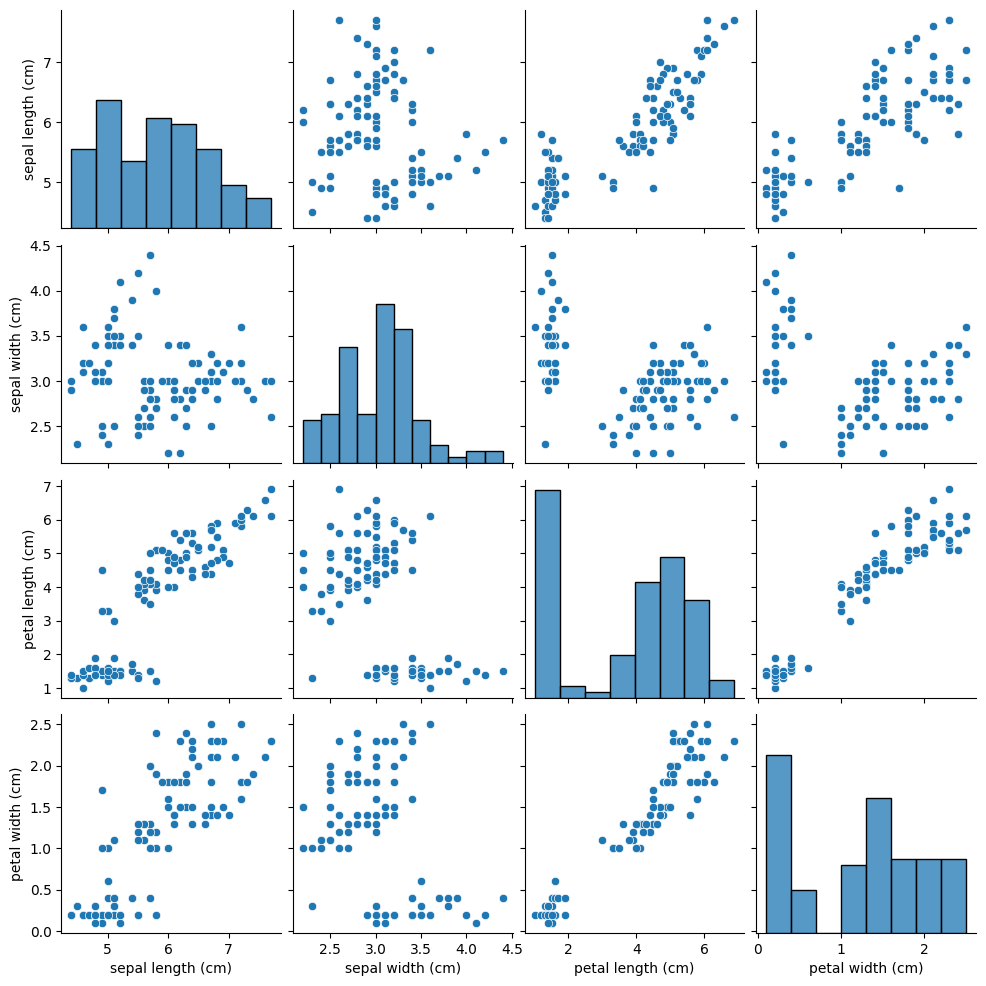

In [198]:
sea.pairplot (X_train)

In [199]:
for column in X_train:
    X_train[column] = boxcox (X_train[column])[0]
    X_train.drop (columns=[column], axis=1)

In [200]:
for column in X_test:
    X_test[column] = boxcox (X_test[column])[0]
    X_test.drop (columns=[column], axis=1)

In [201]:
X_train

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
145           1.642234          1.003669           3.707790          1.079474
32            1.450917          1.256986           0.487113         -1.250380
35            1.420618          1.057095           0.197741         -1.033593
129           1.695178          1.003669           4.195880          0.542687
21            1.435939          1.175194           0.487113         -0.705487
..                 ...               ...                ...               ...
75            1.631096          1.003669           3.046124          0.372705
95            1.521107          1.003669           2.878513          0.192630
144           1.642234          1.082366           4.114974          1.220148
85            1.559881          1.106759           3.129581          0.542687
7             1.420618          1.106759           0.487113         -1.033593

[105 rows x 4 columns]

In [205]:
from scipy.special import inv_boxcox

for column in X_train:
    X_train[column] = inv_boxcox (X_train)
    X_train.drop (columns=[column], axis=1)

TypeError: inv_boxcox() takes from 2 to 3 positional arguments but 1 were given

In [209]:
X.dtypes.value_counts ()

float64    4
dtype: int64

In [3]:
!pip3 install langchain_community

  Using cached aiohttp-3.10.10-cp312-cp312-macosx_11_0_arm64.whl.metadata (7.6 kB)
  Using cached aiohappyeyeballs-2.4.3-py3-none-any.whl.metadata (6.1 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl.metadata (4.0 kB)
  Using cached frozenlist-1.5.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (13 kB)
  Using cached multidict-6.1.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.0 kB)
  Using cached yarl-1.17.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (64 kB)
  Using cached propcache-0.2.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (7.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 10.9 MB/s eta 0:00:0031m11.6 MB/s eta 0:00:01
Using cached aiohttp-3.10.10-cp312-cp312-macosx_11_0_arm64.whl (390 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.6 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.1 MB/s eta 0:00:00
Using cached aiohappyeyeballs-2.4.3-py3-none-any.whl (14 kB)
Using cached aiosignal-1.3.1-py3-none-any.whl (7.6 kB)
Using cached frozenlist-1.5.0-cp312-cp312-macosx_11_0_arm64.whl (51 kB)
Using cached multidict-6.1.0-cp312-cp312-macosx_11_0_arm64.whl (29 kB)
Using cached yarl-1.17.1-cp312-cp312-macosx_11_0_arm64.whl (92 kB)
Using cached propcache-0.2.0-cp312-cp312-macosx_11_0_arm64.whl (45 kB)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip


In [10]:
import bs4
from langchain_community.document_loaders import WebBaseLoader

In [16]:
loader = WebBaseLoader(
    web_paths=("https://github.com/GsnMithra/",)
)
docs = loader.load()

In [23]:
print(docs)

[Document(metadata={'source': 'https://github.com/GsnMithra/', 'title': 'GsnMithra (Mithra) · GitHub', 'description': 'GsnMithra has 27 repositories available. Follow their code on GitHub.', 'language': 'en'}, page_content="\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nGsnMithra (Mithra) · GitHub\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip to content\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nNavigation Menu\n\nToggle navigation\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n            Sign in\n          \n\n\n\n\n\n\n\n\n        Product\n        \n\n\n\n\n\n\n\n\n\n\n\n\n\nGitHub Copilot\n        Write better code with AI\n      \n\n\n\n\n\n\n\nSecurity\n        Find and fix vulnerabilities\n      \n\n\n\n\n\n\n\nActions\n        Automate any workflow\n      \n\n\n\n\n\n\n\nCodespaces\n        Instant dev environments\n      \n\n\n\n\n\n\n\nIssues\n        Plan and track work\n   